In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv('../data/spotify.csv', encoding='iso-8859-1')
#I'm not sure whatsup with this encoding, but it gave me an error originally.
# When i passed the error to chatgpt it told me to try this. ¯\_(ツ)_/¯


<h1>Goals</h1>

1. A high-level summary of the data through EDA.
2. Some highlight facts about the data through well-designed visualizations.
3. Some ideas about how to use this data in business or policy from what you have
learned.
4. Present the above to the audience.

In [4]:
print(f"We have {df.shape[0]} entries and {df.shape[1]} columns")
print(len(df['Artist'].unique()),'artists')
print(len(df['Track'].unique()), 'Tracks')

We have 4600 entries and 29 columns
2000 artists
4370 Tracks


<h1> Column Descriptions </h1>

+         Track Name: Name of the song.
+         Album Name: Name of the album the song belongs to.
+         Artist: Name of the artist(s) of the song.
+         Release Date: Date when the song was released.
+         ISRC: International Standard Recording Code for the song.
+         All Time Rank: Ranking of the song based on its all-time popularity.
+         Track Score: Score assigned to the track based on various factors.
+         Spotify Streams: Total number of streams on Spotify.
+         Spotify Playlist Count: Number of Spotify playlists the song is included in.
+         Spotify Playlist Reach: Reach of the song across Spotify playlists.
+         Spotify Popularity: Popularity score of the song on Spotify.
+         YouTube Views: Total views of the song's official video on YouTube.
+         YouTube Likes: Total likes on the song's official video on YouTube.
+         TikTok Posts: Number of TikTok posts featuring the song.
+         TikTok Likes: Total likes on TikTok posts featuring the song.
+         TikTok Views: Total views on TikTok posts featuring the song.
+         YouTube Playlist Reach: Reach of the song across YouTube playlists.
+         Apple Music Playlist Count: Number of Apple Music playlists the song is included in.
+         AirPlay Spins: Number of times the song has been played on radio stations.
+         SiriusXM Spins: Number of times the song has been played on SiriusXM.
+         Deezer Playlist Count: Number of Deezer playlists the song is included in.
+         Deezer Playlist Reach: Reach of the song across Deezer playlists.
+         Amazon Playlist Count: Number of Amazon Music playlists the song is included in.
+         Pandora Streams: Total number of streams on Pandora.
+         Pandora Track Stations: Number of Pandora stations featuring the song.
+         Soundcloud Streams: Total number of streams on Soundcloud.
+         Shazam Counts: Total number of times the song has been Shazamed.
+         TIDAL Popularity: Popularity score of the song on TIDAL.
+         Explicit Track: Indicates whether the song contains explicit content.

In [5]:
df.isnull().any()

#Most cols have missing values

#Seems to me like our target variable is Spotify Streams? What do y'all think?

Track                         False
Album Name                    False
Artist                         True
Release Date                  False
ISRC                          False
All Time Rank                 False
Track Score                   False
Spotify Streams                True
Spotify Playlist Count         True
Spotify Playlist Reach         True
Spotify Popularity             True
YouTube Views                  True
YouTube Likes                  True
TikTok Posts                   True
TikTok Likes                   True
TikTok Views                   True
YouTube Playlist Reach         True
Apple Music Playlist Count     True
AirPlay Spins                  True
SiriusXM Spins                 True
Deezer Playlist Count          True
Deezer Playlist Reach          True
Amazon Playlist Count          True
Pandora Streams                True
Pandora Track Stations         True
Soundcloud Streams             True
Shazam Counts                  True
TIDAL Popularity            

In [6]:
df['Spotify Streams'].isnull().sum()
#113 missing values. 
# In lecture yesterday she said if your target is missing, drop those rows. 


113

In [7]:
df_cleaned = df.dropna(subset=['Spotify Streams'])
len(df) - len(df_cleaned)
#just double checking that that function worked :) 


113

In [8]:
df_cleaned.dtypes
#Hmm, I think Spotify Streams should be int type. 
#Get rid of commas so we can convert to int type.
df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].str.replace(',','')
df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].astype('int')
print(df_cleaned['Spotify Streams'].dtype)



int64


/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_17367/1366611653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].str.replace(',','')
/var/folders/vb/c_7gcdvd2kg4s_jdwfky3xhm0000gn/T/ipykernel_17367/1366611653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].astype('int')


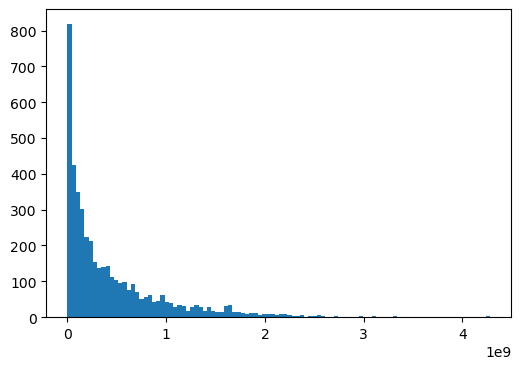

In [9]:
fig, ax = plt.subplots(figsize=(6,4))

ax.hist(df_cleaned['Spotify Streams'], bins=100)

plt.show()

#This is about what I expected. A few songs are extremely popular,
#  and most songs have a relatively small number of streams


In [10]:
print(df_cleaned['Spotify Streams'].quantile([.01, .1, .25, .5, .75, .9, .99]))


0.01    9.834700e+03
0.10    1.387903e+07
0.25    7.038630e+07
0.50    2.398507e+08
0.75    6.283638e+08
0.90    1.190402e+09
0.99    2.307692e+09
Name: Spotify Streams, dtype: float64


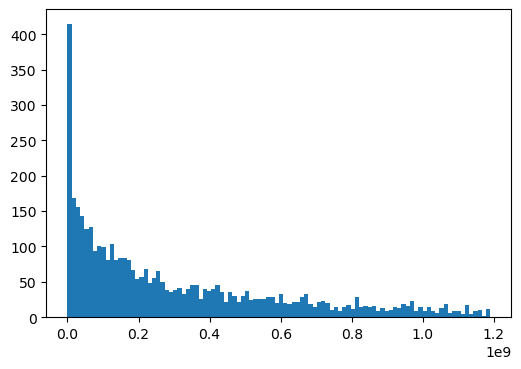

In [11]:
#Lets look at our distribution without the outliers
fig, ax = plt.subplots(figsize=(6,4))

low_90 = df_cleaned[df_cleaned['Spotify Streams'] < df_cleaned['Spotify Streams'].quantile(0.90)]

ax.hist(low_90['Spotify Streams'], bins=100)

plt.show()

#Distribution looks exponential? 

In [12]:
df_cleaned[df_cleaned['Spotify Streams']== df_cleaned['Spotify Streams'].max()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
55,Blinding Lights,Blinding Lights,The Weeknd,11/29/2019,USUG11904206,56,194.0,4281468720,"590,392","165,544,011",...,"1,116",564.0,"11,701,129",184.0,"489,299,762","319,634","28,659,471","28,994,660",NaN,0


In [13]:
df_cleaned.select_dtypes(include=['number'])

,Track Score,Spotify Streams,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
0,725.4,390470936,92.0,210.0,62.0,114.0,NaN,0
1,545.9,323703884,92.0,188.0,67.0,111.0,NaN,1
2,538.4,601309283,92.0,190.0,136.0,172.0,NaN,0
3,444.9,2031280633,85.0,394.0,264.0,210.0,NaN,0
4,423.3,107034922,88.0,182.0,82.0,105.0,NaN,1
...,...,...,...,...,...,...,...,...
4595,19.4,305049963,71.0,3.0,2.0,NaN,NaN,1
4596,19.4,52282360,56.0,1.0,1.0,NaN,NaN,0
4597,19.4,189972685,65.0,19.0,1.0,6.0,NaN,1
4598,19.4,145467020,66.0,1.0,NaN,7.0,NaN,0


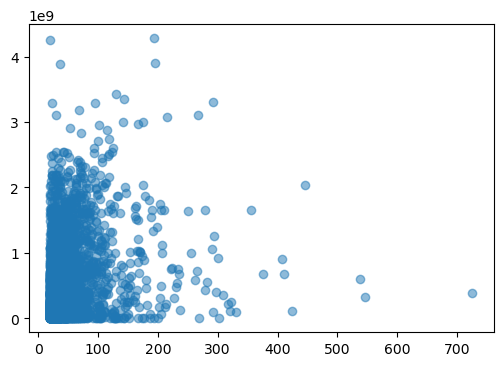

In [14]:
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(df_cleaned['Track Score'], df_cleaned['Spotify Streams'], alpha=.5)


plt.show()

In [15]:
df_cleaned.loc[df_cleaned['Track Score'].idxmax()]


Track                                  MILLION DOLLAR BABY
Album Name                    Million Dollar Baby - Single
Artist                                       Tommy Richman
Release Date                                     4/26/2024
ISRC                                          QM24S2402528
All Time Rank                                            1
Track Score                                          725.4
Spotify Streams                                  390470936
Spotify Playlist Count                              30,716
Spotify Playlist Reach                         196,631,588
Spotify Popularity                                    92.0
YouTube Views                                   84,274,754
YouTube Likes                                    1,713,126
TikTok Posts                                     5,767,700
TikTok Likes                                   651,565,900
TikTok Views                                 5,332,281,936
YouTube Playlist Reach                         150,597,0

In [65]:
artist_streams= df_cleaned.groupby('Artist')['Spotify Streams'].sum()
#artist_streams = artist_streams.reset_index()

artist_streams = artist_streams.sort_values(ascending=False)
print(artist_streams)


# len(df_cleaned['Artist'].unique())
# print(artist_streams.index.values)
# print(artist_streams.values)
# art_streams_d={}
# for artist, stream in zip(artist_streams.index.values, artist_streams.values):
#     art_streams_d[artist] = stream

# print(art_streams_d)

Artist
Bad Bunny            37054834425
The Weeknd           36948540278
Drake                34962157577
Taylor Swift         34470771165
Post Malone          26137472958
                        ...     
mitsu sound                 1384
Zeme Libre                  1332
Dan-E-MC                    1224
Azul                        1186
Harp and a monkey           1071
Name: Spotify Streams, Length: 1919, dtype: int64


10000000000.0


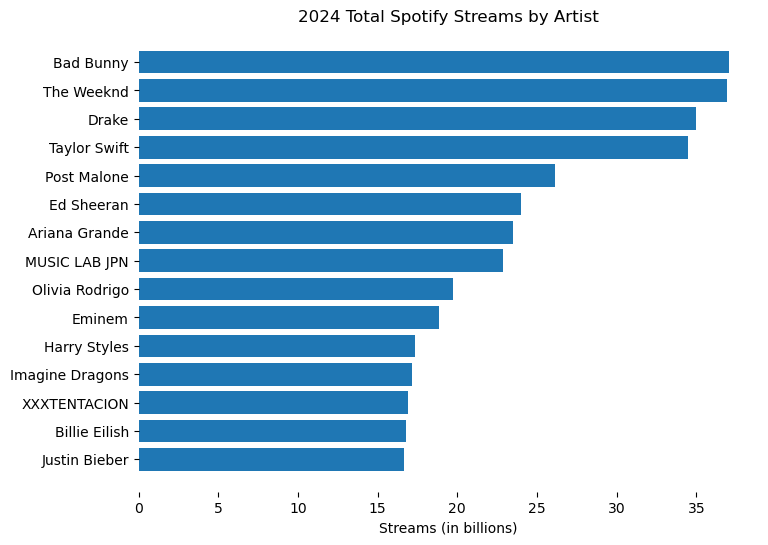

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
top15=artist_streams[:15].sort_values()

x=list(top15.index.values[:15])
y=list(top15.values[:15])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Streams (in billions)')
ax.set_title('2024 Total Spotify Streams by Artist')
ax.barh(x,y)
ax.set_xticks([0, 5e9, 1e10,15e9, 2e10,25e9, 3e10, 35e9])
ax.set_xticklabels([0, 5,10,15,20,25,30,35])
print(1e10)
10000000000.0
plt.show()

10000000000.0


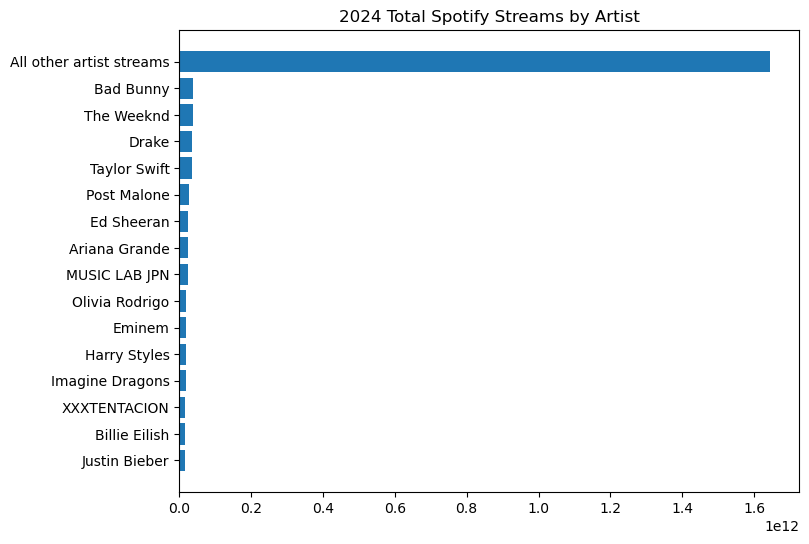

In [70]:
fig, ax = plt.subplots(figsize=(8,6))

rest_of_artists = artist_streams.values[15:].sum()

x=list(top15.index.values[:15])+['All other artist streams']
y=list(top15.values[:15]) +[rest_of_artists]


ax.set_title('2024 Total Spotify Streams by Artist')
ax.barh(x,y)
print(1e10)
10000000000.0
plt.show()